In [125]:
  #Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [126]:
#Load dataset
df = pd.read_csv("/content/Employee-Attrition - Employee-Attrition.csv")

In [127]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,NaN
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,NaN
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,NaN
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,NaN


**Data Preprocessing and Cleaning**

In [128]:
isna_counts = df.isna().sum()
print(isna_counts)

Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBa

In [129]:
df.drop(['Unnamed: 35'],axis=1,inplace=True)

In [130]:
isna_counts = df.isna().sum()
print(isna_counts)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [131]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})

In [132]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [133]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [134]:
print(df.shape[1])

35


In [135]:
#LabelEncoder Method
from sklearn.preprocessing import LabelEncoder

categorical_col = df.select_dtypes(include='object').columns

In [136]:
categorical_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [137]:
encoders = {}

for col in categorical_col:
  encoders[col] = LabelEncoder()
  df[col] = encoders[col].fit_transform(df[col])

In [138]:
encoders

{'BusinessTravel': LabelEncoder(),
 'Department': LabelEncoder(),
 'EducationField': LabelEncoder(),
 'Gender': LabelEncoder(),
 'JobRole': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Over18': LabelEncoder(),
 'OverTime': LabelEncoder()}

**Exploratory Data Analysis (EDA)**

In [139]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [140]:
df['Attrition']

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [141]:
df.Attrition.value_counts()

,count
Attrition,
0,1233
1,237


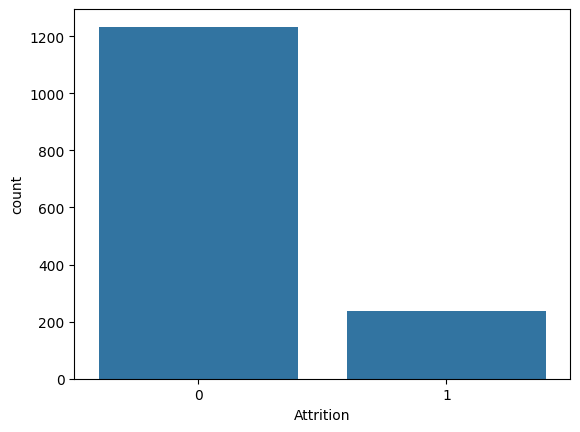

In [142]:
#plot the count difference between majority and minority class

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Attrition', data=df)
plt.show()

**SMOTE Technique - Synthetic Minority Oversampling Technique**

In [357]:
#train_test_split
from sklearn.model_selection import train_test_split
#x = df[['Age', 'Department', 'MaritalStatus', 'OverTime', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'YearsAtCompany']]
x = df.drop('Attrition', axis=1)
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [358]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
smote_x_train, smote_y_train = smote.fit_resample(x_train, y_train)

In [359]:
#print the count of before and after
print(y_train.value_counts())
print(smote_y_train.value_counts())

Attrition
0    978
1    198
Name: count, dtype: int64
Attrition
0    978
1    978
Name: count, dtype: int64


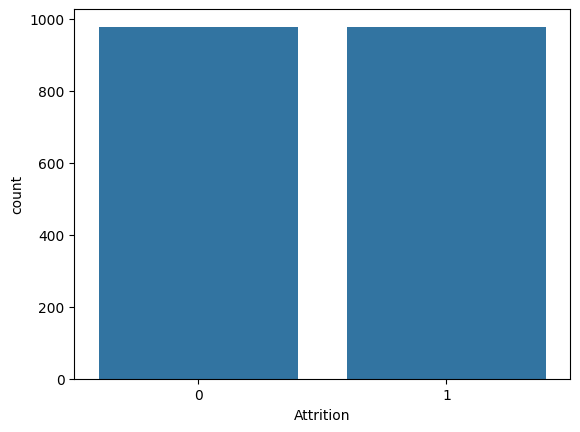

In [360]:
sns.countplot(x=smote_y_train, data=df)
plt.show()

**Machine Learning Model**


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#Step 1: Select features and target
x = df[['Age', 'Department', 'MaritalStatus', 'OverTime', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'YearsAtCompany']]
#x = df.drop("Attrition", axis=1)
y = df['Attrition']

#Step 2: Encode categorical variables
#x_encoded = pd.get_dummies(x, columns=['Department', 'MaritalStatus', 'OverTime', 'JobRole'], drop_first=True)

#Step 3: Train/test split (stratified)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#Step 4: Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

#Step 5: Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

#Step 6: Balance training set with SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

#Step 7: Train models
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_smote, y_train_smote)
y_pred_logreg = logreg.predict(x_test_scaled)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train_smote, y_train_smote)
y_pred_tree = dtree.predict(x_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_smote, y_train_smote)
y_pred_rf = rf.predict(x_test_scaled)

#Step 8: Evaluate models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.7278911564625851
Confusion Matrix:
 [[178  69]
 [ 11  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.82       247
           1       0.34      0.77      0.47        47

    accuracy                           0.73       294
   macro avg       0.64      0.74      0.65       294
weighted avg       0.85      0.73      0.76       294


Decision Tree Classifier:
Accuracy: 0.7789115646258503
Confusion Matrix:
 [[209  38]
 [ 27  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       247
           1       0.34      0.43      0.38        47

    accuracy                           0.78       294
   macro avg       0.62      0.64      0.62       294
weighted avg       0.80      0.78      0.79       294


Random Forest:
Accuracy: 0.8367346938775511
Confusion Matrix:
 [[229  18]
 [ 30  17]]
Classification Report

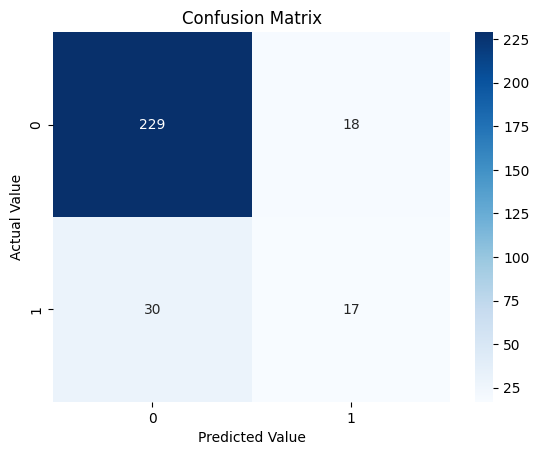

In [144]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Replace y_test and y_pred with your actual test labels and model predictions
cm = confusion_matrix(y_test, y_pred_rf) # or y_pred_logreg / y_pred_tree /y_pred_rf

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

In [145]:
#print the count of before and after
print(y_train.value_counts())
print(y_train_smote.value_counts())

Attrition
0    986
1    190
Name: count, dtype: int64
Attrition
0    986
1    986
Name: count, dtype: int64


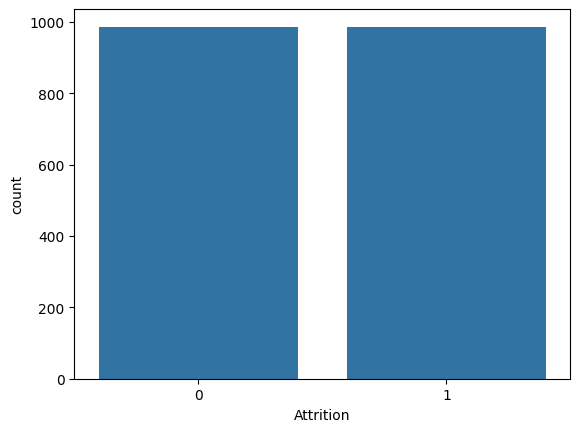

In [146]:
sns.countplot(x=y_train_smote, data=df)
plt.show()

In [147]:
import pickle

# Extract feature names from training data
model_features = x_train.columns.tolist()

# Save the model and features together
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump((rf, model_features), file)

In [148]:
# Load the model and features together
with open('random_forest_model.pkl', 'rb') as file:
    rf, model_features = pickle.load(file)

**Machine Learning Model**

**Logistic Regression**

In [287]:
#load a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [288]:
lr.score(x_test,y_test)

0.8707482993197279

**Decision Tree Classifier**

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
print("Model Accuracy:", model.score(x_test, y_test))


Model Accuracy: 0.7653061224489796


In [235]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [236]:
y_prediction = dt.predict(x_test)

In [237]:
y_test

,Attrition
1041,0
184,0
1222,1
67,0
220,0
...,...
567,0
560,0
945,0
522,0


In [238]:
y_prediction

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [239]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_prediction)

acc

0.7653061224489796

In [289]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

lr.score(x_test_scaled,y_test)

0.8605442176870748

**cross_val_score**

In [290]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to check model performance
cv_scores = cross_val_score(lr, x_test_scaled, y_test, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.86440678 0.86440678 0.84745763 0.86440678 0.87931034]
Mean CV score: 0.8639976621858562


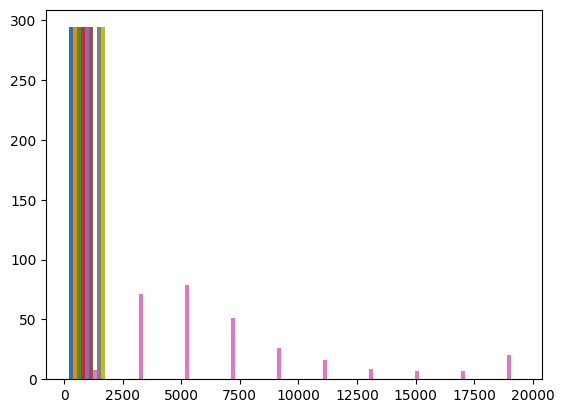

In [291]:
plt.hist(x_test)
plt.show()

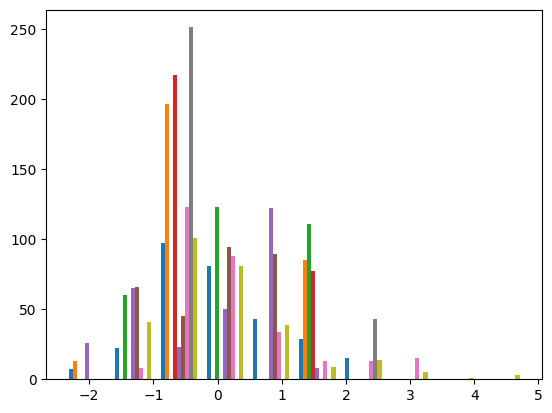

In [292]:
plt.hist(x_test_scaled)
plt.show()

In [363]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [364]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [365]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.54      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.70      0.56      0.57       294
weighted avg       0.81      0.84      0.80       294



In [264]:
import pickle
filename = 'Employee_Attrition.pkl'
pickle.dump(model, open(filename, 'wb'))

In [265]:
model = pickle.load(open('Employee_Attrition.pkl', 'rb'))